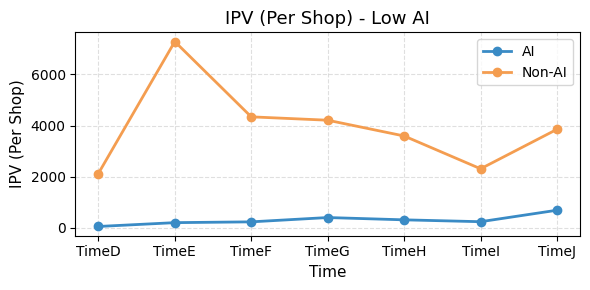

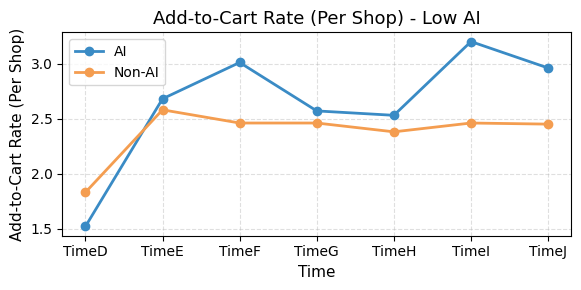

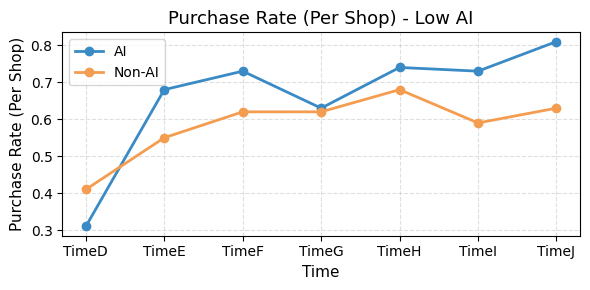

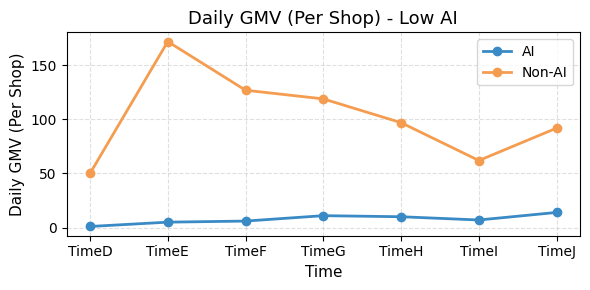

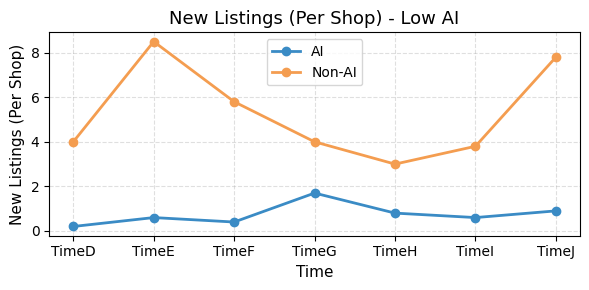

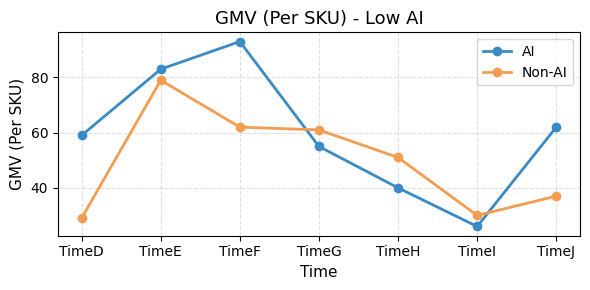

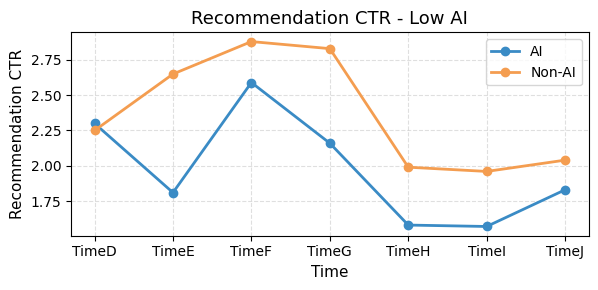

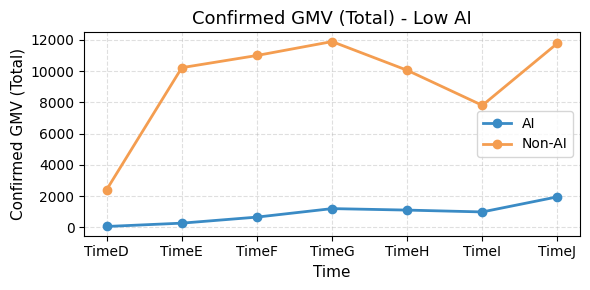

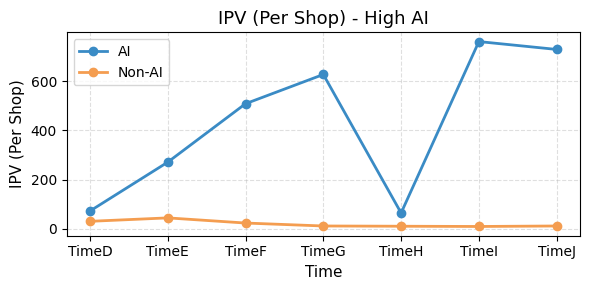

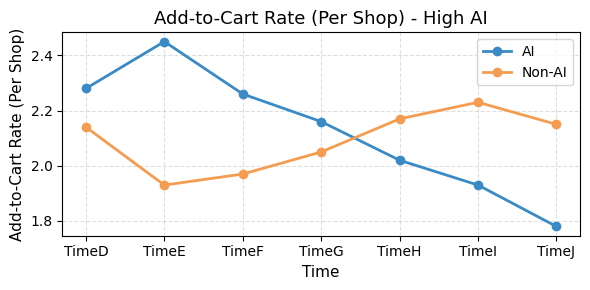

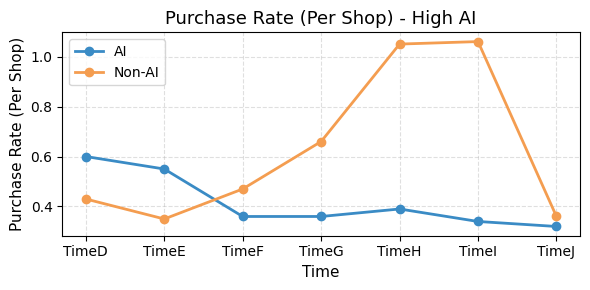

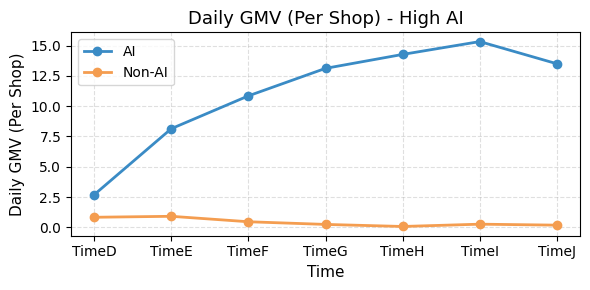

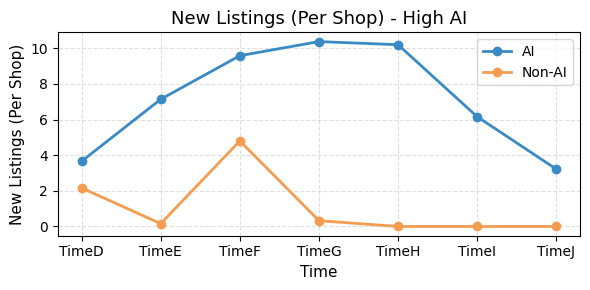

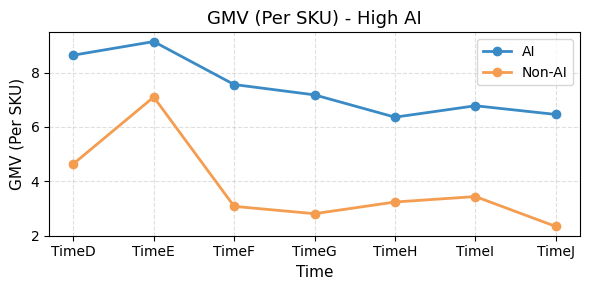

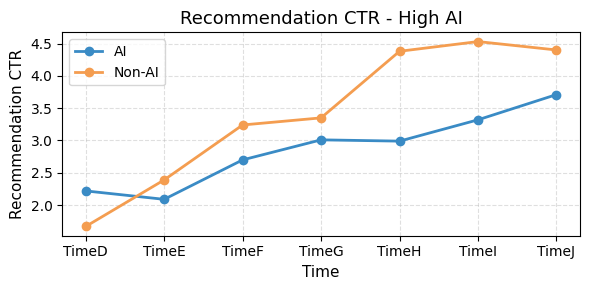

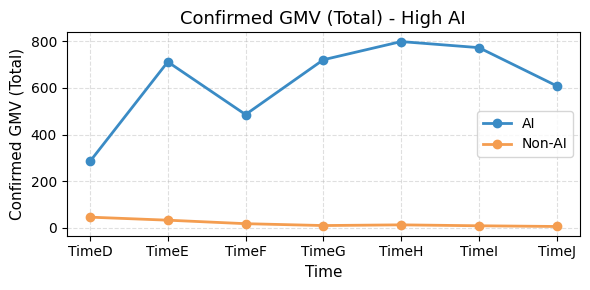

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

times = ["TimeD", "TimeE", "TimeF", "TimeG", "TimeH", "TimeI", "TimeJ"]
palette = {"AI": "#3a8bc5", "Non-AI": "#f49d50"}

# 低 AI 渗透商家数据
low_metrics = {
    "IPV (Per Shop)": {
        "AI": [49, 199, 230, 399, 309, 236, 686],
        "Non-AI": [2121, 7289, 4342, 4210, 3592, 2308, 3855],
    },
    "Add-to-Cart Rate (Per Shop)": {
        "AI": [1.52, 2.68, 3.01, 2.57, 2.53, 3.20, 2.96],
        "Non-AI": [1.83, 2.58, 2.46, 2.46, 2.38, 2.46, 2.45],
    },
    "Purchase Rate (Per Shop)": {
        "AI": [0.31, 0.68, 0.73, 0.63, 0.74, 0.73, 0.81],
        "Non-AI": [0.41, 0.55, 0.62, 0.62, 0.68, 0.59, 0.63],
    },
    "Daily GMV (Per Shop)": {
        "AI": [1, 5, 6, 11, 10, 7, 14],
        "Non-AI": [50, 172, 127, 119, 97, 62, 92],
    },
    "New Listings (Per Shop)": {
        "AI": [0.20, 0.60, 0.40, 1.70, 0.80, 0.60, 0.90],
        "Non-AI": [4.00, 8.50, 5.80, 4.00, 3.00, 3.80, 7.80],
    },
    "GMV (Per SKU)": {
        "AI": [59, 83, 93, 55, 40, 26, 62],
        "Non-AI": [29, 79, 62, 61, 51, 30, 37],
    },
    "Recommendation CTR": {
        "AI": [2.30, 1.81, 2.59, 2.16, 1.58, 1.57, 1.83],
        "Non-AI": [2.25, 2.65, 2.88, 2.83, 1.99, 1.96, 2.04],
    },
    "Confirmed GMV (Total)": {
        "AI": [54, 267, 654, 1_198, 1_103, 985, 1_952],
        "Non-AI": [2_415, 10_222, 11_002, 11_892, 10_054, 7_808, 11_785],
    },
}

# 高 AI 渗透商家数据
high_metrics = {
    "IPV (Per Shop)": {
        "AI": [72, 271, 509, 628, 64, 762, 730],
        "Non-AI": [30, 44, 23, 11, 10, 9, 11],
    },
    "Add-to-Cart Rate (Per Shop)": {
        "AI": [2.28, 2.45, 2.26, 2.16, 2.02, 1.93, 1.78],
        "Non-AI": [2.14, 1.93, 1.97, 2.05, 2.17, 2.23, 2.15],
    },
    "Purchase Rate (Per Shop)": {
        "AI": [0.60, 0.55, 0.36, 0.36, 0.39, 0.34, 0.32],
        "Non-AI": [0.43, 0.35, 0.47, 0.66, 1.05, 1.06, 0.36],
    },
    "Daily GMV (Per Shop)": {
        "AI": [2.69, 8.14, 10.85, 13.12, 14.27, 15.33, 13.50],
        "Non-AI": [0.83, 0.91, 0.46, 0.24, 0.07, 0.26, 0.18],
    },
    "New Listings (Per Shop)": {
        "AI": [3.66, 7.14, 9.584, 10.376, 10.20, 6.16, 3.22],
        "Non-AI": [2.16, 0.16, 4.80, 0.324, 0.0, 0.0, 0.0],
    },
    "GMV (Per SKU)": {
        "AI": [8.64, 9.14, 7.56, 7.18, 6.36, 6.78, 6.46],
        "Non-AI": [4.64, 7.10, 3.08, 2.81, 3.24, 3.44, 2.34],
    },
    "Recommendation CTR": {
        "AI": [2.22, 2.09, 2.70, 3.01, 2.99, 3.32, 3.71],
        "Non-AI": [1.67, 2.39, 3.24, 3.35, 4.38, 4.53, 4.40],
    },
    "Confirmed GMV (Total)": {
        "AI": [285, 712, 486, 721, 799, 773, 609],
        "Non-AI": [46, 33, 18, 10, 13, 9, 6],
    },
}

def plot_group(group_name: str, data_dict: dict):
    for metric, series in data_dict.items():
        df = pd.DataFrame({"Time": times})
        for label, values in series.items():
            df[label] = values

        fig, ax = plt.subplots(figsize=(6, 3))
        for label in df.columns[1:]:
            ax.plot(
                df["Time"],
                df[label],
                marker="o",
                linewidth=2.0,
                color=palette.get(label, None),
                label=label,
            )

        ax.set_title(f"{metric} - {group_name} AI", fontsize=13)
        ax.set_xlabel("Time", fontsize=11)
        ax.set_ylabel(metric, fontsize=11)
        ax.set_xticks(times)
        ax.tick_params(axis="x", rotation=0)
        ax.grid(True, linestyle="--", alpha=0.4)
        ax.legend(frameon=True)
        plt.tight_layout()
        plt.show()

plot_group("Low", low_metrics)

plot_group("High", high_metrics)

In [4]:
import pandas as pd
from scipy import stats

def table_from_metrics(metrics, times):
    rows = []
    for metric, vals in metrics.items():
        ai = pd.Series(vals["AI"], index=times, dtype=float)
        non = pd.Series(vals["Non-AI"], index=times, dtype=float)
        res = stats.ttest_ind(ai, non, equal_var=False)

        diff = ai.mean() - non.mean()
        rel = diff / non.mean() if non.mean() != 0 else float('inf')

        rows.append({
            "Metric": metric,
            "Mean AI": round(ai.mean(), 3),
            "Mean Non-AI": round(non.mean(), 3),
            "Abs Lift": round(diff, 3),
            "Rel Lift": round(rel, 3),
            "t-stat": round(res.statistic, 3),
            "p-value": round(res.pvalue, 3),
        })
    return pd.DataFrame(rows)

# 示例调用
low_results = table_from_metrics(low_metrics, times)
high_results = table_from_metrics(high_metrics, times)

print("Low AI Merchant:\n", low_results)
print("\nHigh AI Merchant:\n", high_results)

Low AI Merchant:
                         Metric  Mean AI  Mean Non-AI  Abs Lift  Rel Lift  \
0               IPV (Per Shop)  301.143     3959.571 -3658.429    -0.924   
1  Add-to-Cart Rate (Per Shop)    2.639        2.374     0.264     0.111   
2     Purchase Rate (Per Shop)    0.661        0.586     0.076     0.129   
3         Daily GMV (Per Shop)    7.714      102.714   -95.000    -0.925   
4      New Listings (Per Shop)    0.743        5.271    -4.529    -0.859   
5                GMV (Per SKU)   59.714       49.857     9.857     0.198   
6           Recommendation CTR    1.977        2.371    -0.394    -0.166   
7        Confirmed GMV (Total)  887.571     9311.143 -8423.571    -0.905   

   t-stat  p-value  
0  -5.621    0.001  
1   1.157    0.280  
2   1.076    0.309  
3  -6.051    0.001  
4  -5.445    0.001  
5   0.876    0.399  
6  -1.867    0.087  
7  -6.560    0.000  

High AI Merchant:
                         Metric  Mean AI  Mean Non-AI  Abs Lift  Rel Lift  \
0           